In [1061]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from statsmodels.tsa.seasonal import seasonal_decompose

from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [1062]:
df=pd.read_csv("INFY.csv",index_col='Date',parse_dates=True)

In [1063]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,INFY,EQ,1333.80,1332.25,1351.30,1321.00,1345.00,1343.55,1343.19,7088606,9.521361e+14,130375.0,4218129.0,0.5951
2021-04-27,INFY,EQ,1343.55,1346.00,1353.00,1340.15,1347.50,1348.50,1346.89,3636115,4.897445e+14,145974.0,1871084.0,0.5146
2021-04-28,INFY,EQ,1348.50,1358.00,1359.50,1344.60,1355.80,1356.00,1353.45,4879234,6.603778e+14,137376.0,2857134.0,0.5856


# Data Preprocessing

In [1064]:
df['Date']=df.index

In [1065]:
start_date='2020-01-01'
end_date='2020-12-31'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)

In [1066]:
df=df.loc[mask]

In [1067]:
df=df.ffill()

In [1068]:
df['Prev Close'].isnull().values.any()

False

In [1069]:
df=df.drop(columns=['Date','Symbol','Series'])

In [1070]:
df.dropna(inplace=True)

<AxesSubplot:>

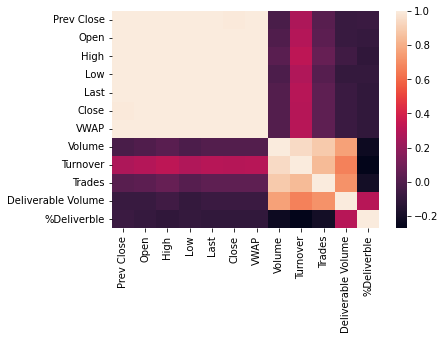

In [1071]:
sn.heatmap(df.corr())

In [1072]:
df=df.asfreq('B')
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=262, freq='B')

In [1073]:
df=df.ffill(axis=0)
df['Prev Close'].isnull().values.any()

False

In [1074]:
Ntest=math.trunc(0.3*len(df))
train=df.iloc[:-Ntest,3]
test=df.iloc[-Ntest:,3]

In [1075]:
Decomp_results=seasonal_decompose(df['Prev Close'])

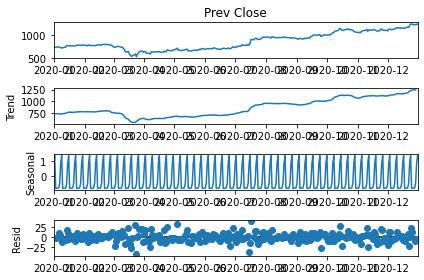

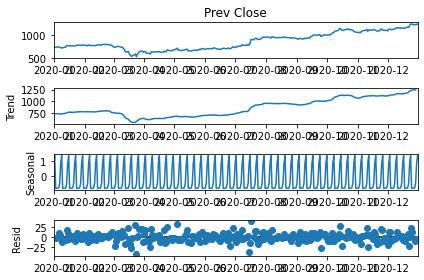

In [1076]:
Decomp_results.plot()

In [1077]:
exo=df.iloc[:,:11]
exo_train=exo.iloc[:-Ntest]
exo_test=exo.iloc[-Ntest:]


In [1078]:
exo=exo.asfreq('B')
exo.ffill()
exo=np.nan_to_num(exo)

In [1079]:
auto_arima(df['Prev Close'],exogenous=exo,m=1,trace=True,D=1).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1255.306, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1198.680, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1260.004, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1241.843, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=262.592, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1258.635, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1258.493, Time=0.33 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1237.470, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1206.584, Time=0.25 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 2.636 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  262
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 644.002
Date:                Sun, 25 Sep 2022   AIC                          -1260.004
Time:                        11:41:21   BIC                          -1210.048
Sample:                             0   HQIC                         -1239.926
                                - 262                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0167   6.85e-35   2.44e+32      0.000       0.017       0.017
x1             1.0000   2.02e-32   4.95e+31      0.000       1.000       1.000
x2         -1.776e-15   2.24e-32  -7.92e+16      0.000   -1.78e-15   -1.78e-15
x3          -2.22e-15   2.36e-32  -9.43e+16      0.000   -2.22e-15   -2.22e-15
x4         -7.105e-15   2.19e-32  -3.24e+17      0.000   -7.11e-15   -7.11e-15
x5         -1.243e-14    2.2e-32  -5.66e+17      0.000   -1.24e-14   -1.24e-14
x6         -3.553e-15    2.2e-32  -1.61e+17      0.000   -3.55e-15   -3.55e-15
x7          1.776e-14   2.24e-32   7.92e+17      0.000    1.78e-14    1.78e-14
x8         -3.541e-17   2.69e-27  -1.31e+10      0.000   -3.54e-17   -3.54e-17
x9         -3.286e-17   2.56e-19   -128.507      0.000   -3.34e-17   -3.24e-17
x10         -2.57e-17   2.84e-29  -9.05e+11      0.000   -2.57e-17   -2.57e-17
x11        -2.246e-18   5.24e-28  -4.28e+09      0.000   -2.25e-18   -2.25e-18
ar.L1          0.4631   2.98e-36   1.55e+35      0.000       0.463       0.463
sigma2         0.0004   8.85e-33   4.84e+28      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):             29011.27
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               2.99   Skew:                             5.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        53.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.18e+49. Standard errors may be unstable.
"""

# ARIMAX

In [1080]:
model_arimax=ARIMA(train,exog=exo_train,order=(1,0,0))

Model_arimax=model_arimax.fit()

Model_arimax.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    Low   No. Observations:                  184
Model:                     ARMA(1, 0)   Log Likelihood                 500.632
Method:                       css-mle   S.D. of innovations             77.212
Date:                Sun, 25 Sep 2022   AIC                           -973.263
Time:                        11:41:26   BIC                           -928.254
Sample:                    01-01-2020   HQIC                          -955.021
                         - 09-14-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0021      0.016      0.132      0.895      -0.029       0.033
Prev Close          9.434e-07      0.000      0.006      0.995      -0.000       0.000
Open               -2.398e-06      0.000     -0.016      0.988      -0.000       0.000
High                -1.72e-06      0.000     -0.008      0.993      -0.000       0.000
Low                    1.0000        nan        nan        nan         nan         nan
Last                8.803e-07      0.001      0.002      0.999      -0.001       0.001
Close               1.454e-06      0.001      0.003      0.998      -0.001       0.001
VWAP                2.524e-06      0.000      0.008      0.993      -0.001       0.001
Volume             -2.049e-10   3.75e-08     -0.005      0.996   -7.36e-08    7.32e-08
Turnover           -1.838e-17    3.3e-08  -5.57e-10      1.000   -6.47e-08    6.47e-08
Trades              4.148e-10   3.44e-08      0.012      0.990    -6.7e-08    6.79e-08
Deliverable Volume  5.556e-11   3.91e-08      0.001      0.999   -7.66e-08    7.67e-08
ar.L1.Low              0.4379      0.062      7.031      0.000       0.316       0.560
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2835           +0.0000j            2.2835            0.0000
-----------------------------------------------------------------------------
"""

# SARIMAX

In [1091]:
model_sarimax=SARIMAX(train,exog=exo_train,order=(1,0,0),seasonal_order=(0,0,0,0) )

Model_sarimax=model_sarimax.fit()

Model_sarimax.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Low   No. Observations:                  184
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 359.805
Date:                Sun, 25 Sep 2022   AIC                           -693.609
Time:                        11:41:53   BIC                           -651.815
Sample:                    01-01-2020   HQIC                          -676.670
                         - 09-14-2020                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Prev Close         -4.284e-13   1.54e-32  -2.78e+19      0.000   -4.28e-13   -4.28e-13
Open               -1.599e-13   2.05e-32  -7.81e+18      0.000    -1.6e-13    -1.6e-13
High                4.806e-12   2.25e-32   2.14e+20      0.000    4.81e-12    4.81e-12
Low                    1.0000   2.05e-32   4.88e+31      0.000       1.000       1.000
Last               -1.115e-11   1.96e-32  -5.69e+20      0.000   -1.11e-11   -1.11e-11
Close               1.329e-11   1.99e-32   6.68e+20      0.000    1.33e-11    1.33e-11
VWAP               -4.004e-12   2.07e-32  -1.93e+20      0.000      -4e-12      -4e-12
Volume              8.761e-17   5.77e-27   1.52e+10      0.000    8.76e-17    8.76e-17
Turnover            4.929e-17   5.45e-19     90.516      0.000    4.82e-17    5.04e-17
Trades             -1.627e-16   5.61e-29   -2.9e+12      0.000   -1.63e-16   -1.63e-16
Deliverable Volume -4.762e-17   1.13e-27  -4.22e+10      0.000   -4.76e-17   -4.76e-17
ar.L1                  0.7687   4.27e-36    1.8e+35      0.000       0.769       0.769
sigma2                 0.0012   1.12e-32   1.05e+29      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                  10.07   Jarque-Bera (JB):             16065.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               6.52   Skew:                            -3.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        48.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.73e+50. Standard errors may be unstable.
"""

# Prediction

In [1092]:
start_len=len(train)
end_len=len(train)+len(test)-1

In [1093]:
pred_arimax=Model_arimax.predict(start=start_len,end=end_len,exog=exo_test,typ='levels')

In [1094]:
pred_sarimax=Model_sarimax.predict(start=start_len,end=end_len,exog=exo_test,typ='levels')

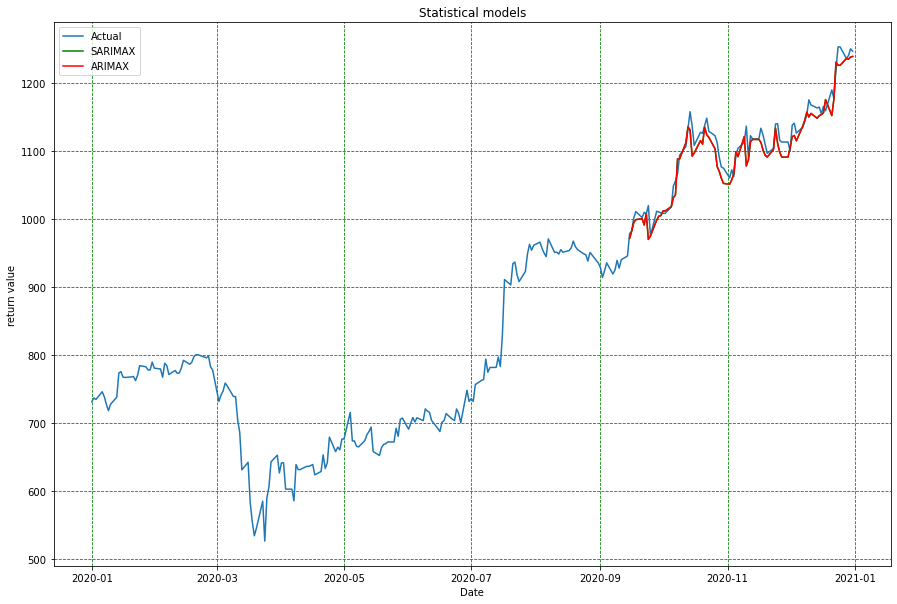

In [1095]:
plt.figure(figsize=(15,10))
plt.plot(df['Prev Close'],label='Actual')
plt.plot(pred_sarimax,label='SARIMAX',color='green')
plt.plot(pred_arimax,label='ARIMAX',color='red')
plt.title('Statistical models')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

In [1096]:
len(pred_arimax)
test=df['Prev Close'].iloc[-len(pred_arimax):]

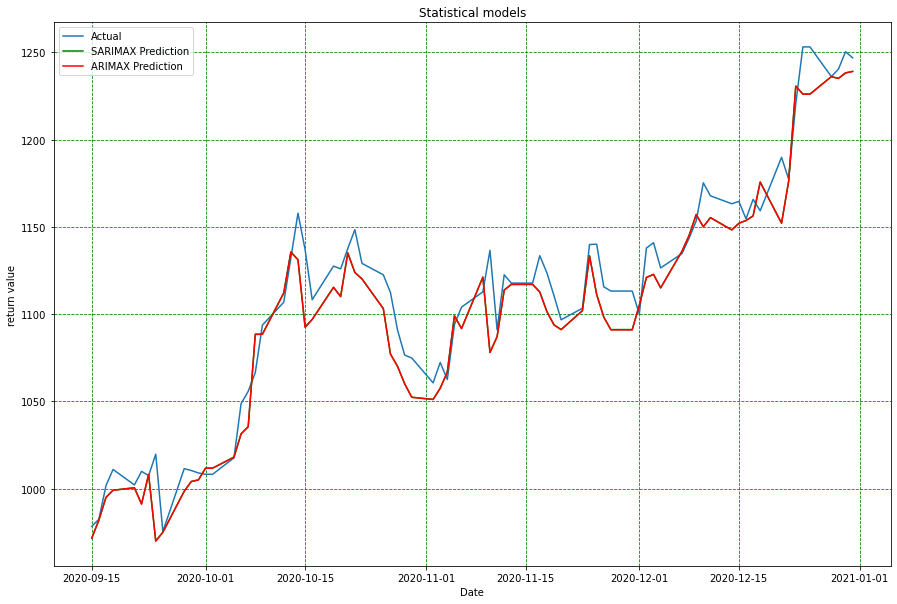

In [1097]:
plt.figure(figsize=(15,10))
plt.plot(test,label='Actual')
plt.plot(pred_sarimax,label='SARIMAX Prediction',color='green')
plt.plot(pred_arimax,label='ARIMAX Prediction',color='red')
plt.title('Statistical models')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

# Evaluation

    ARIMAX

In [1098]:
test=np.nan_to_num(test)
rmse=math.sqrt(mean_squared_error(test,pred_arimax))
print(rmse)

17.687753085076288


In [1099]:
error=mean_absolute_error(test,pred_arimax)
print(error)

13.240658656232808


In [1100]:
r2_score(test,pred_arimax)

0.9328578192631175

    SARIMAX

In [1101]:
test=np.nan_to_num(test)
rmse=math.sqrt(mean_squared_error(test,pred_sarimax))
print(rmse)

17.63030064180367


In [1102]:
error=mean_absolute_error(test,pred_sarimax)
print(error)

13.196827097983629


In [1103]:
r2_score(test,pred_sarimax)

0.9332932863882324